<a href="https://colab.research.google.com/github/suchitra2020180/RS_GIS_Python/blob/main/GDAL_Geospatial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting Familiar with the Command Prompt
All the commands in the exercises below are expected to be run from the Anaconda Prompt on Windows or a Terminal on Mac/Linux. We will now cover basic terminal commands that will help you get comfortable with the environment

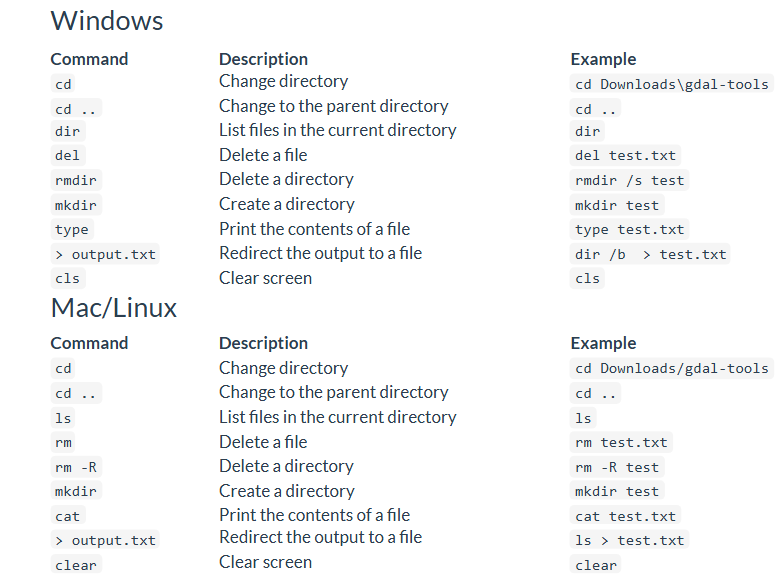

In [ ]:
!pip install condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge gdal proj

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - gdal
    - proj


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aom-3.9.1                  |       hac33072_0         2.6 MB  conda-forge
    blosc-1.21.6               |       hef167b5_0          48 KB  conda-forge
    ca-certificates-2024.12.14 |       hbcca054_0         153 KB  conda-f

In [ ]:
from osgeo import gdal

In [ ]:
!gdalinfo --version

GDAL 3.10.0, released 2024/11/01


In [ ]:
!gdalinfo --formats

Supported Formats: (ro:read-only, rw:read-write, +:update, v:virtual-I/O s:subdatasets)
  VRT -raster,multidimensional raster- (rw+v): Virtual Raster (*.vrt)
  DERIVED -raster- (ro): Derived datasets using VRT pixel functions
  GTI -raster- (rov): GDAL Raster Tile Index (*.gti.gpkg, *.gti.fgb, *.gti)
  SNAP_TIFF -raster- (rov): Sentinel Application Processing GeoTIFF
  GTiff -raster- (rw+vs): GeoTIFF (*.tif, *.tiff)
ERROR 1: PROJ: proj_create: no database context specified
ERROR 1: Cannot parse CRS http://www.opengis.net/def/crs/EPSG/0/5482
ERROR 1: PROJ: proj_create: no database context specified
ERROR 1: Cannot parse CRS http://www.opengis.net/def/crs/EPSG/0/5936
ERROR 1: PROJ: proj_create: no database context specified
ERROR 1: Cannot parse CRS http://www.opengis.net/def/crs/EPSG/0/3978
ERROR 1: PROJ: proj_create: no database context specified
ERROR 1: Cannot parse CRS http://www.opengis.net/def/crs/EPSG/0/2193
  COG -raster- (wv): Cloud optimized GeoTIFF generator (*.tif, *.tiff)
 

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading srtm data
dem1='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/N27E086.hgt'
dem2='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/N27E087.hgt'
dem3='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/N28E086.hgt'
dem4='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/N28E087.hgt'

In [ ]:
#get info of each srtm file data
dem1_data=gdal.Open(dem3)
print(dem1_data.GetMetadata())

{'AREA_OR_POINT': 'Point'}


In [ ]:
dem1_data.GetGeoTransform()

(85.99986111111112,
 0.0002777777777777778,
 0.0,
 29.000138888888888,
 0.0,
 -0.0002777777777777778)

In [ ]:
#Projection
dem1_data.GetProjection()


'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [ ]:
band=dem1_data.GetRasterBand(1)
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7bac2e37fb10> >

In [ ]:
dem1_data.GetCornerCoordinates()

AttributeError: 'Dataset' object has no attribute 'GetCornerCoordinates'

In [ ]:
#Size of raster
print(f"Dimensions: {dem1_data.RasterXSize} x {dem1_data.RasterYSize}")

Dimensions: 3601 x 3601


In [ ]:
#Bands in raster
dem1_data.RasterCount

1

In [ ]:
#Stats of the bands
 # Iterate over bands to get detailed information
dataset=dem1_data
for i in range(1, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(i)
    print(f"Band {i}:")
    print("  Minimum:", band.GetMinimum())
    print("  Maximum:", band.GetMaximum())
    print("  Statistics:", band.GetStatistics(True, True))
    print("  NoData Value:", band.GetNoDataValue())

Band 1:
  Minimum: 2535.0
  Maximum: 8275.0
  Statistics: [2535.0, 8275.0, 5067.3736484857, 550.3900581765]
  NoData Value: -32768.0


In [ ]:
#Creating raster with existing dems
input_files=[dem1,dem2,dem3,dem4];
output_vrt='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/SRTM_Merge.vrt'
# Build the VRT
gdal.BuildVRT(output_vrt, input_files)

print(f"VRT created at: {output_vrt}")

VRT created at: /content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/SRTM_Merge.vrt


In [ ]:
##Converting .vrt to .tif
output_tif='/content/drive/MyDrive/Jobs_Projects_Doc/Spatial_Analysis_Python/data/SRTM_Merge.tif'
gdal_translate -output_vrt -output_tif

Open streetmap

In [3]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 2.9 MB/s eta 0:00:00


In [4]:
import osmnx as ox

In [6]:
city=ox.geocode_to_gdf('Vijayawada,India')

ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

AttributeError: module 'osmnx' has no attribute 'project_gdf'

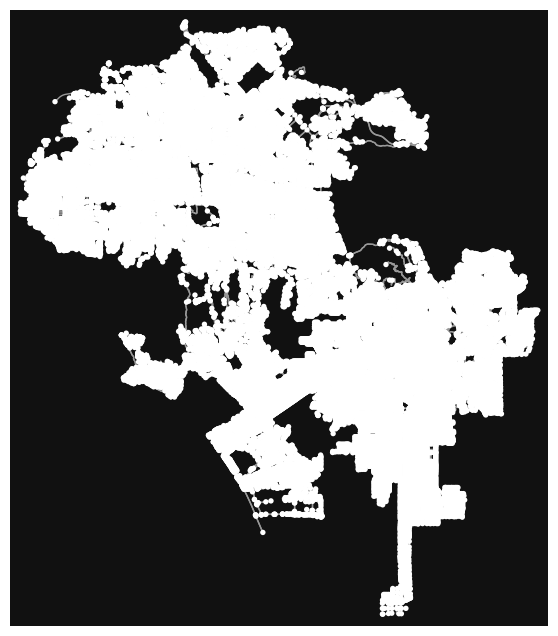

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
G = ox.graph_from_place('Los Angeles, California', network_type='drive')
ox.plot_graph(G)

<Figure size 1400x1400 with 0 Axes>

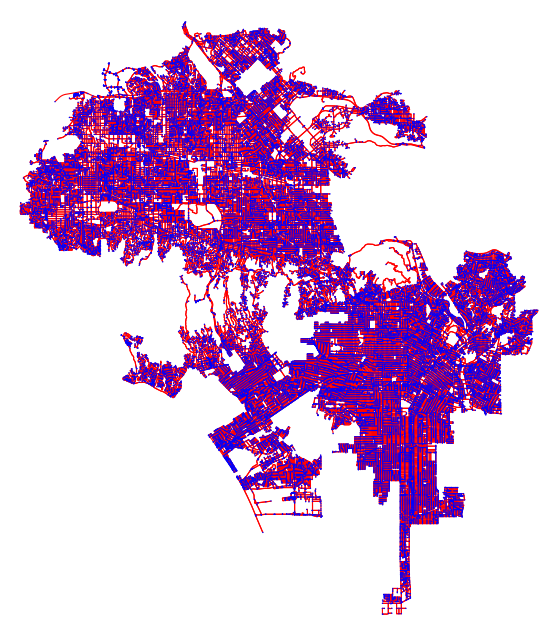

In [11]:
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(14, 14))

# Plot the graph with a lighter background
ox.plot_graph(G, bgcolor='white', node_size=1, edge_linewidth=0.8, node_color='blue',edge_color='red')
plt.show()